#### Vehicle Loan Default Prediction

Questions:

1. Who are the loan defaulters/spend? 
2. Usual Amount taken by loan defaulter?


### why not a model to predict if a customer will be defaulting the loan based on his records?

In [1]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data with encode 
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [3]:
train.loc[:5,'UniqueID':'loan_default'] #loan_default, DisbursalDate

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0


In [10]:
# Printing unique values in our dataset
#print(test.nunique())

In [20]:
#Couting null in each column
#test.isnull().sum()

In [27]:
#Searching nans
#nans = lambda df: df[df.isnull().any(axis=1)]
#nans(train)

In [19]:
#values = {'Employment.Type': "Unspecified"}
#train = train.fillna(value=values)
#values = {'Employment.Type': "Unspecified"}
#test = test.fillna(value=values)

In [21]:
#train = train.dropna(axis=0)

In [25]:
# Select duplicate rows except first occurrence based on all columns
#duplicateRowsDF = test[test.duplicated()]
 
#print("Duplicate Rows except first occurrence based on all columns are :")
#print(duplicateRowsDF)

In [22]:
print("Train",train.shape)
print('Test',test.shape)
#test.loc[:5,'UniqueID':'loan_default'] #loan_default, DisbursalDate

Train (233154, 41)
Test (112392, 40)



#### Independent-


#### ID:

- UniqueID                               233154 non-null int64 -- Unique project Id
- branch_id                              233154 non-null int64 -- Branch where the loan was disbursed
- supplier_id                            233154 non-null int64 -- Vehicle Dealer where the loan was disbursed
- manufacturer_id                        233154 non-null int64 -- Vehicle manufacturer(Hero, Honda, TVS etc.)
- Current_pincode_ID                     233154 non-null int64 -- Current pincode of the customer
- State_ID                               233154 non-null int64 -- State of disbursement
- Employee_code_ID                       233154 non-null int64 -- Employee of the organization who logged the disbursement


#### Continuous
- ltv                                    233154 non-null float64 -- Loan to Value of the asset
- disbursed_amount                       233154 non-null int64 -- Amount of Loan disbursed
- asset_cost                             233154 non-null int64 -- Cost of the Asset
- PRI.CURRENT.BALANCE                    233154 non-null int64 -- amount
- PRI.SANCTIONED.AMOUNT                  233154 non-null int64 -- amount
- PRI.DISBURSED.AMOUNT                   233154 non-null int64 -- amount
- SEC.CURRENT.BALANCE                    233154 non-null int64 -- amount
- SEC.SANCTIONED.AMOUNT                  233154 non-null int64 -- amount
- SEC.DISBURSED.AMOUNT                   233154 non-null int64 -- amount
- PRIMARY.INSTAL.AMT                     233154 non-null int64 -- EMI Amount of the primary loan
- SEC.INSTAL.AMT                         233154 non-null int64 -- EMI Amount of the secondary loan

#### Discrete:

- PERFORM_CNS.SCORE                      233154 non-null int64 -- Bureau Score
- PRI.NO.OF.ACCTS                        233154 non-null int64 -- count
- PRI.ACTIVE.ACCTS                       233154 non-null int64 -- count
- PRI.OVERDUE.ACCTS                      233154 non-null int64 -- count
- SEC.NO.OF.ACCTS                        233154 non-null int64 -- count
- SEC.ACTIVE.ACCTS                       233154 non-null int64 -- count
- SEC.OVERDUE.ACCTS                      233154 non-null int64 -- count
- NEW.ACCTS.IN.LAST.SIX.MONTHS           233154 non-null int64 -- new loans
- DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    233154 non-null int64 -- defaulted loans
- AVERAGE.ACCT.AGE                       233154 non-null object - avg since first loan
- CREDIT.HISTORY.LENGTH                  233154 non-null object - time since first loan
- NO.OF_INQUIRIES                        233154 non-null int64 - no. of enquiries for the loan

#### Date:
- Date.of.Birth                          233154 non-null object -- Time
- DisbursalDate                          233154 non-null object

#### Categorical: Nominal
- Employment.Type                        225493 non-null object -- Salaried/Self Employed
- PERFORM_CNS.SCORE.DESCRIPTION          233154 non-null object -- Bureau Score Description
- MobileNo_Avl_Flag                      233154 non-null int64 -- Mobile given or not
- Aadhar_flag                            233154 non-null int64 --
- PAN_flag                               233154 non-null int64
- VoterID_flag                           233154 non-null int64
- Driving_flag                           233154 non-null int64
- Passport_flag                          233154 non-null int64

##### Dependent- Nominal
- loan_default                           233154 non-null int64 -- TARGET, Payment default in the first EMI on due date

In [32]:
percentage_dist = round(train['loan_default'].value_counts(normalize=True) * 100,2)
print(percentage_dist)

0    78.29
1    21.71
Name: loan_default, dtype: float64


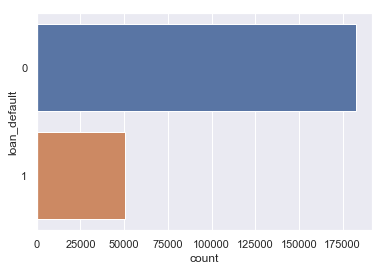

In [33]:
sns.set(style='darkgrid')
sns.countplot(y = 'loan_default',
              data = train,
              order = percentage_dist.index)
plt.show()

In [34]:
percentage_dist = round(train['Employment.Type'].value_counts(normalize=True) * 100,2)
print(percentage_dist)

Self employed    54.74
Salaried         41.97
Unspecified       3.29
Name: Employment.Type, dtype: float64


#### Feature Extraction: 

    - Convert timestamp to calc age in months.
    - One hot encode categorical values

In [36]:
#Month Counter function
def con_months(s):
    s = str(s).split(' ')
    return (int(''.join(filter(str.isdigit, s[0])))*12+int(''.join(filter(str.isdigit, s[1]))))

def get_features(df_rm):
    df_rm['Avg_Act_Age'] = df_rm.apply(lambda r: con_months(r['AVERAGE.ACCT.AGE']), axis=1)
    df_rm['Credit_his_len'] = df_rm.apply(lambda r: con_months(r['CREDIT.HISTORY.LENGTH']), axis=1)
    df_rm['DOB'] = pd.to_datetime(df_rm['Date.of.Birth'], format='%d-%m-%y').dt.strftime('%Y-%m-%d')
    df_rm['DisbursalDate'] = pd.to_datetime(df_rm['DisbursalDate'], format='%d-%m-%y').dt.strftime('%Y-%m-%d')
    df_rm['DisbursalDate'] = pd.to_datetime(df_rm['DisbursalDate'])
    df_rm['DOB'] = pd.to_datetime(df_rm['DOB'])
    df_rm['nb_months'] = ((df_rm.DisbursalDate - df_rm.DOB)/np.timedelta64(1, 'M')).round().astype(int)
    onehot = pd.get_dummies(df_rm['Employment.Type'])
    df_rm = onehot.join(df_rm)
    onehot = pd.get_dummies(df_rm['PERFORM_CNS.SCORE.DESCRIPTION'])
    df_rm = onehot.join(df_rm)

    return(df_rm)

train = get_features(train)
test = get_features(test)

In [40]:
col=['A-Very Low Risk', 'B-Very Low Risk','C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk', 'F-Low Risk', 'G-Low Risk','H-Medium Risk','I-Medium Risk','J-High Risk','K-High Risk','L-Very High Risk','M-Very High Risk','No Bureau History Available', 'Not Scored: No Activity seen on the customer (Inactive)', 'Not Scored: No Updates available in last 36 months', 'Not Scored: Not Enough Info available on the customer', 'Not Scored: Only a Guarantor','Not Scored: Sufficient History Not Available', 'Salaried', 'Self employed', 'disbursed_amount', 'asset_cost','ltv', 'MobileNo_Avl_Flag', 'Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag','PERFORM_CNS.SCORE',
'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS',
'SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES','Unspecified','Avg_Act_Age','Credit_his_len','nb_months'] #'AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH',

#### Creating model and Testing Accuracy

1. RandomForestClassifier - 65%
2. XGBClassifier - 67%

In [41]:
from sklearn import *
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = model_selection.train_test_split(train[col].fillna(-1), train[['loan_default']], random_state=1, stratify=train[['loan_default']], 
                                                    test_size=0.25)
#Normalizing the features 
import math
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)
X_valid = sc_X.transform(test[col])

In [42]:
model = multiclass.OneVsRestClassifier(ensemble.RandomForestClassifier(max_depth = 7, n_estimators=1000, random_state=33))
#model = multiclass.OneVsRestClassifier(ensemble.ExtraTreesClassifier(n_jobs=-1, n_estimators=100, random_state=33))

#param_dist = {'objective': 'binary:logistic', 'max_depth': 1, 'n_estimators':1000, 'num_round':1000, 'eval_metric': 'logloss'}
#model = multiclass.OneVsRestClassifier(xgb.XGBClassifier(**param_dist))

model.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=33, verbose=0, warm_start=False),
          n_jobs=1)

In [43]:
import math
import pickle
# save the model to disk
filename = 'RandomForestClassifier.sav'
pickle.dump(model, open(filename, 'wb'))

In [69]:
# some time later...
filename = 'RandomForestClassifier.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print('Accuracy:',(math.exp(-metrics.log_loss(y_test, loaded_model.predict_proba(X_test)))))
#Making predictions on the Test Set
valid_pred = loaded_model.predict_proba(X_valid)
test['loan_default'] = valid_pred
test[['UniqueID', 'loan_default']].to_csv('submissionRF.csv', index=False)

Accuracy: 0.6026088923031009


In [45]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classifierObj.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[45585    51]
 [12605    48]]
0.7828749849885913


In [46]:
filename = 'LogisticRegression.sav'
pickle.dump(classifierObj, open(filename, 'wb'))

In [47]:
#Making predictions on the Test Set
valid_pred = classifierObj.predict(X_valid)

In [66]:
test['loan_default'] = valid_pred
test[['UniqueID', 'loan_default']].to_csv('submission.csv', index=False)

In [70]:
from sklearn.tree import DecisionTreeClassifier
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(X_train,y_train)
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classifierObj.score(X_test, y_test))
#Making predictions on the Test Set
valid_pred = classifierObj.predict(X_valid)
test['loan_default'] = valid_pred
test[['UniqueID', 'loan_default']].to_csv('submissionDT.csv', index=False)

[[35632 10004]
 [ 9304  3349]]
0.6687539673008629


In [71]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj 
from sklearn.ensemble import RandomForestClassifier 
classifierObj = RandomForestClassifier(criterion='entropy') 
classifierObj.fit(X_train,y_train)
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classifierObj.score(X_test, y_test))
#Making predictions on the Test Set
valid_pred = classifierObj.predict(X_valid)
test['loan_default'] = valid_pred
test[['UniqueID', 'loan_default']].to_csv('submissionRF.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[43750  1886]
 [11775   878]]
0.7656333098869427
